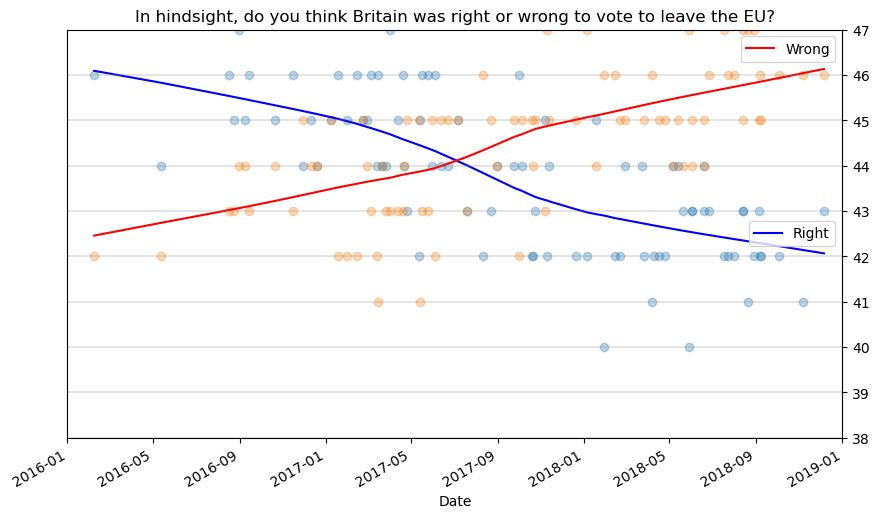

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.nonparametric.smoothers_lowess import lowess


def read_data(filepath: str) -> pd.DataFrame:
    """
    Read the data from a CSV file and return a pandas DataFrame.

    Args:
        filepath: A string representing the path to the CSV file.

    Returns:
        A pandas DataFrame containing the data.
    """
    df = pd.read_csv(filepath, header=3, parse_dates=[0])
    df.index = df['Date']
    return df


def make_lowess(series: pd.Series) -> pd.Series:
    """
    Apply the LOWESS smoothing algorithm to a pandas Series and return the smoothed data.

    Args:
        series: A pandas Series representing the data to be smoothed.

    Returns:
        A pandas Series containing the smoothed data.
    """
    endog = series.values
    exog = series.index.values
    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)
    return pd.Series(data, index=pd.to_datetime(index))


def plot_data(df: pd.DataFrame) -> None:
    """
    Plot the data and smoothed data using matplotlib.

    Args:
        df: A pandas DataFrame containing the data to be plotted.

    Returns:
        None
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the data
    df['% responding right'].plot(color='C0', ax=ax, marker='o', linewidth=0, alpha=0.3, label='')
    df['% responding wrong'].plot(color='C1', ax=ax, marker='o', linewidth=0, alpha=0.3, label='')

    # Plot the smoothed data
    right = make_lowess(df['% responding right'])
    right.plot(color='blue', label='Right', ax=ax)

    wrong = make_lowess(df['% responding wrong'])
    wrong.plot(color='red', label='Wrong', ax=ax)

    # Set the y-axis on the right
    ax.yaxis.tick_right()

    # Set the y-axis limits
    ax.set_ylim(38, 47)

    # Set the x-axis limits to show only 2016, 2017, and 2018
    ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2019-01-01'))

    # Add horizontal lines for all y-axis ticks
    for y in ax.get_yticks():
        ax.axhline(y=y, color='gray', linestyle='-', alpha=0.2)  # Set alpha to 0.3

    # Move the "Right" label below the blue line
    right_legend = ax.legend([ax.lines[2]], ['Right'], loc='center right')

    # Move the "Wrong" label above the red line
    wrong_legend = ax.legend([ax.lines[3]], ['Wrong'], loc='upper right')

    # Add the "Right" label back to the figure
    ax.add_artist(right_legend)

    # add a header to the chart
    plt.title("In hindsight, do you think Britain was right or wrong to vote to leave the EU?")

    # Show the plot
    plt.show()


if __name__ == '__main__':
    os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad")
    filepath = "brexitor.csv"
    df = read_data(filepath)
    plot_data(df)
